# Understanding KS_Test 

Kolmogorov–Smirnov test is a kind of hypothesis test with below problem

## Problem:  to test if the two distributions are similar or not

* To know whether these two distributions are similar or not if we take the cdf of these distributions they should overlap.

## Selecting null and alternate hypothesis:

* the null hypothesis and the alternative hypothesis would be
* H0: ‘X1’ and ‘X2’ have the same distribution.
* H1: ‘X1’ and ‘X2’ don’t have the same distribution.

## Test statistic:

* Difference in the cdf values for any point.
* When the CDFs overlap completely, then at any point on the ‘X’ axis, the difference in the CDF is zero.

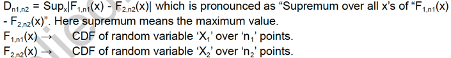


￼
* If both ‘n1’ and ‘n2’ are large and ‘X1’ and ‘X2’ come from the same distribution, then the difference between the CDFs at any point is zero, and finally the value of Dn1,n2 = 0. (We can accept the null hypothesis).

* After thorough research, it is found that we can reject the null hypothesis at a level ‘α’ if 


image.png


Where n1, n2 → sample sizes of ‘X1’, and ‘X2’ respectively. And α → ‘p’ value

## p-value for K-S Test

* In Hypothesis testing, we reject the null hypothesis at a significant level ‘α’, if the p-value < α.

* But here in KS test, we reject the null hypothesis at a significance level ‘α’, if
￼
image.png


* Value of c(alpha) is

image.png

* By substituting above condition c(alpha) in Dn1n2 we will arrive at below equation

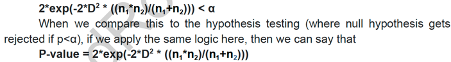
￼

## Ks test using scipy.stats library:

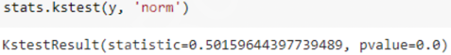
￼
* Here ‘statistic’ is Dn1,n2 and PValue is ‘pvalue’.

> <h4> <font size=4 color='#339933'> A company wants know if black friday spendings of males follow a normal distribution.A sample of 30 males were asked about thier spendings and thier answers were recorded. Determine if this sample comes from normal distribution with 5% signinifance level.  </font> </h4>

__<font  color='#7300e6'>Q:Given two samples, how can we find whether they are follow same distribution or not? </font>__
<img src='https://i.imgur.com/rgWfmCf.png' width=150>

<font color='#339933'>
    Ans: <font color='red'>Q-Q Plot </font>can be used for graphically visualize how two distributions are ,but Q-Q plot cannot quantify how much different one distribution is to another. Therefore we cannot perform Hypothesis testing using Q-Q plot.

</font>

__<font color='#7300e6'>Q:Then how to measure the Similarity ?</font>__

><font color='green'>The Kolmogorov-Smirnov test (KS-test) tries to determine if two datasets differ significantly. The KS-test has the advantage of making no assumption about the distribution of data</font>

KS Test can be performed for two types of problems.
1. There's the <b>one sample Kolmogorov-Smirnov test</b> for testing if a variable follows a given distribution in a population. This “given distribution” is usually -not always- the normal distribution, hence “Kolmogorov-Smirnov normality test”. 
2. There's also the <b>independent samples Kolmogorov-Smirnov test</b> for testing if a variable has identical distributions in 2 populations.

How to perform KS Test? (As Explained Above)

1. State the Null hypothesis that both the random variables come from same distribution
2. State the  Alternative hypothesis that both the random variables do not come from same distribution
3. Setup a confidence interval value
4. Calculate the D value using following formula $D_n,_m=Maximum|F_n(X)−F_m(X)|$
5. The null hypothesis is rejected at level $\alpha $ if $$D_{n,m} > c(\alpha) \sqrt(\frac{n+m}{nm})$$ where $c(\alpha)=\sqrt(-\frac{1}{2}log_e\alpha)$ <br> $n$,$m$ =number of points in samples.

Lets Understand KS Test with the Black Friday dataset.

## Import section

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

Output hidden; open in https://colab.research.google.com to view.

## Download dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           8873        269  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            791         35  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2113         68  1.0              
evangower/premier-league-match-

In [3]:
! kaggle datasets download -d sdolezel/black-friday
!unzip /content/black-friday.zip

 80% 6.00M/7.51M [00:00<00:00, 62.1MB/s]
100% 7.51M/7.51M [00:00<00:00, 73.6MB/s]
Archive:  /content/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


train.csv

The dataset here is a sample of the transactions made in a retail store on blackFriday

https://www.kaggle.com/datasets/sdolezel/black-friday


In [4]:
df = pd.read_csv('train.csv')
print("number of data points in our popultion:", df.shape)
print("% of missing values",df['Purchase'].isnull().sum() * 100 / len(df))
df.head(2)

number of data points in our popultion: (550068, 12)
% of missing values 0.0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Number of samples in our data:  550068


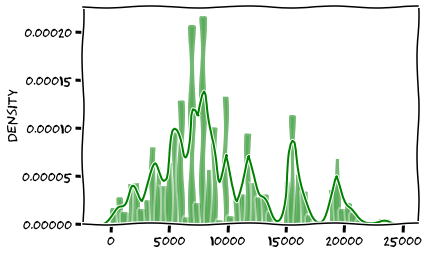

In [5]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.distplot(data, color='g')
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

Number of samples in our data:  550068


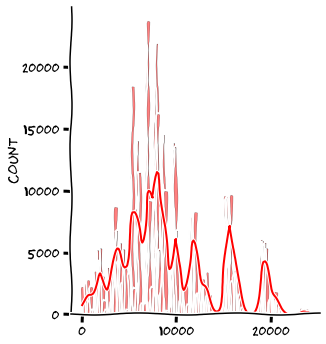

In [6]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.displot(data, color='r', kde = True)
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

### KS test in Python

KS Test in python can be performed using <b>scipy.stats.ks_2samp</b> api


  <h4><font color='blue'> Step 1:</font> <b>Stating Null Hypothesis and Alternate Hypothesis</b></h4>
 

<font color='brown'> Null Hypothesis $H_0$</font>:The black friday spendings of males follow a normal distribution.<br>
<font color='brown'> Alternative Hypothesis $H_a$</font>: The black friday spendings of males do not follow a normal distribution.

In [7]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
data_male = np.array(df[df['Gender']=='M']['Purchase'].values)
# Taking one sample of size 500 from unknown disb
samples = np.array(random.sample(range(0, data_male.shape[0]), 30))
samples = (samples-samples.mean())/samples.std()

# Taking a sample of size 1000 from known disb
norm_samples=np.random.normal(loc=0.0, scale=1.0, size=30)
# norm_samples=(normal-normal.mean())/normal.std()

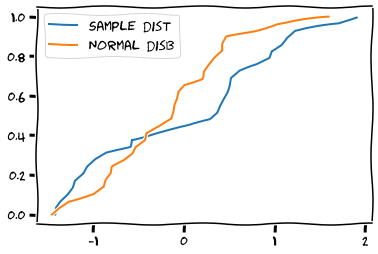

In [9]:
sorted_data = np.sort(samples)
yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)


norm_sorted_data = np.sort(norm_samples)
norm_yvals=np.arange(len(sorted_data))/float(len(sorted_data)-1)

plt.plot(sorted_data,yvals,label='Sample dist')
plt.plot(norm_sorted_data,norm_yvals,label='Normal disb')

plt.legend()
plt.show()

<font color='blue'> Step 2:</font> <b>Choosing significance level</b>

 Note that the significance level is  mentioned in the problem.<font color='red'> $$\alpha=0.05 $$</font>

<font color='blue'> Step 3:</font> <b>Calculating the test statistic</b>

* Here the test statistic we are dealing with is $D_N,_M$

* $D_N,_M$ is maximum distance between CDF of two distributions 


In [10]:
#https://github.com/scipy/scipy/blob/v0.14.0/scipy/stats/stats.py#L3809
#sorting the data
data1 = np.sort(samples)
data2 = np.sort(norm_samples)
#storing the length of data
n1 = data1.shape[0]
n2 = data2.shape[0]
data_all = np.concatenate([data1, data2])
#calculating cdf
cdf1 = np.searchsorted(data1, data_all, side='right') / n1
cdf2 = np.searchsorted(data2, data_all, side='right') / n2
# d=max(abs(cdf1-cdf2))
d = np.max(np.absolute(cdf1 - cdf2))

In [11]:
print('The test statictic d=',d)

The test statictic d= 0.30000000000000004


<h4> Calculating test statistic using scipy.stats api </h4>

In [12]:
from scipy.stats import ks_2samp
d,p=ks_2samp(norm_samples,samples)

In [13]:
print('The D value when calculated using scipy.stats api is',d ,'which is exactly equal to value we got')

The D value when calculated using scipy.stats api is 0.3 which is exactly equal to value we got


In [14]:
print('Corresponding P value for the D is ',p)

Corresponding P value for the D is  0.13500350250095441


<font color='blue'> Step 4:</font> <b>Comparing P value with Significance level</b>

<font> We can clearly observe that P value <font color='red'>0.135 > 0.05</font> and hence we <b>fail to reject the null </b> hypothesis $H_0$ that both the first sample come from normal distribution </font>